In [1]:
import healpy as hp
import numpy as np
import pysm
import pebbles
import matplotlib.pyplot as plt
plt.style.use('supermongo')
%matplotlib inline

In [2]:
nside = 256
npix = hp.nside2npix(nside)
theta_fwhm = 10

In [3]:
dust_i = pysm.nominal.models('d1', nside)[0]['A_I']

In [4]:
#beta = hp.read_map("/home/ben/Projects/simonsobs/mapspace/src/pebbles/data/beta_synch_NKsims_512_0.fits")
beta = pysm.nominal.models('s1', nside)[0]['spectral_index']
beta = hp.ud_grade(beta, nside_out=nside)

In [5]:
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
theta = np.pi / 2. - theta

In [6]:
beta_smo = hp.smoothing(beta, fwhm=np.pi/180.*theta_fwhm)
beta_so_mask = pebbles.plotting.apply_so_mask(beta)
beta_smo_so_mask = pebbles.plotting.apply_so_mask(beta_smo)

Sigma is 254.796540 arcmin (0.074117 rad) 
-> fwhm is 600.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [7]:
theta_so_mask = pebbles.plotting.apply_so_mask(theta)
phi_so_mask = pebbles.plotting.apply_so_mask(phi)

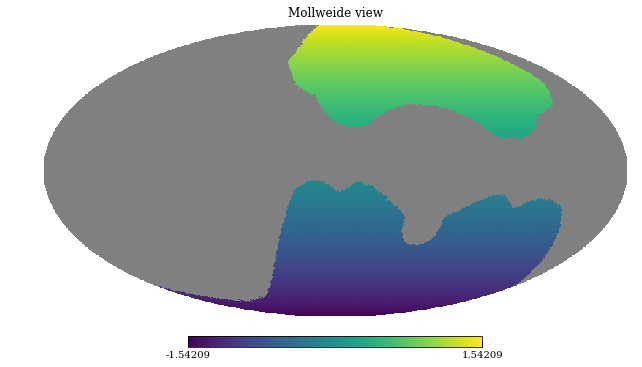

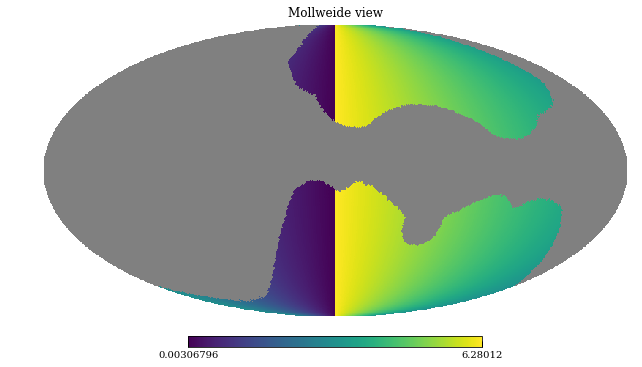

In [8]:
hp.mollview(theta_so_mask)
hp.mollview(phi_so_mask)

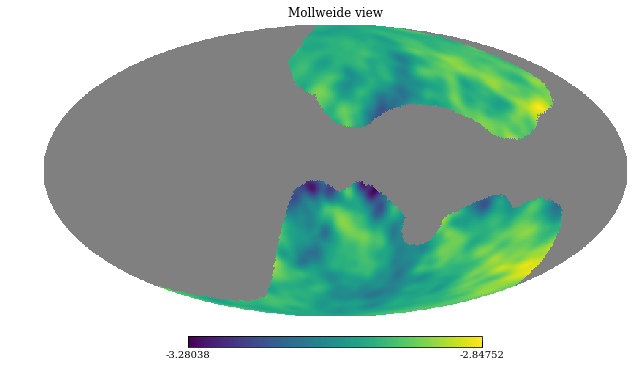

In [9]:
hp.mollview(beta_so_mask)


In [10]:
ind1 = (phi < 5.) * (phi > 2.) * (theta > 0)
ind2 = np.logical_not(ind1) * (theta > 0)
ind3 = (phi < 5.) * (phi > 2.) * (theta <= 0)
ind4 = np.logical_not(ind3) * (theta <= 0)

In [11]:
mask1 = np.zeros_like(phi)
mask2 = np.zeros_like(phi)
mask3 = np.zeros_like(phi)
mask4 = np.zeros_like(phi)

In [12]:
mask1[ind1] = 1
mask2[ind2] = 1
mask3[ind3] = 1
mask4[ind4] = 1

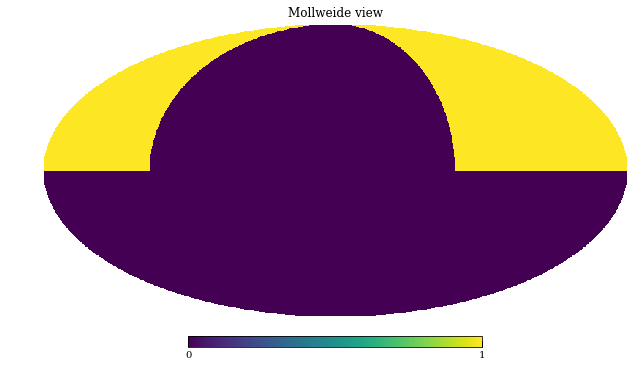

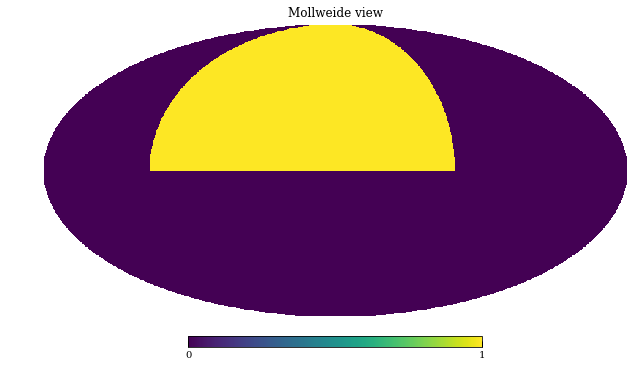

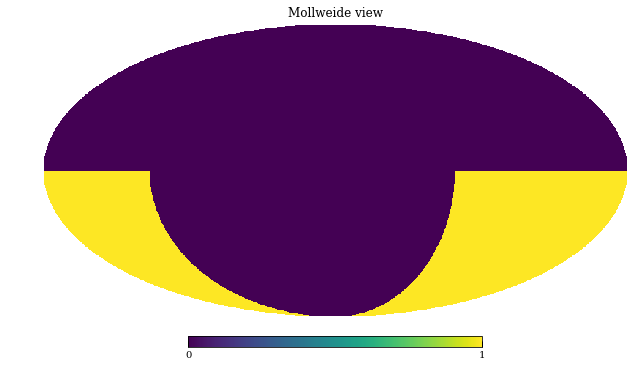

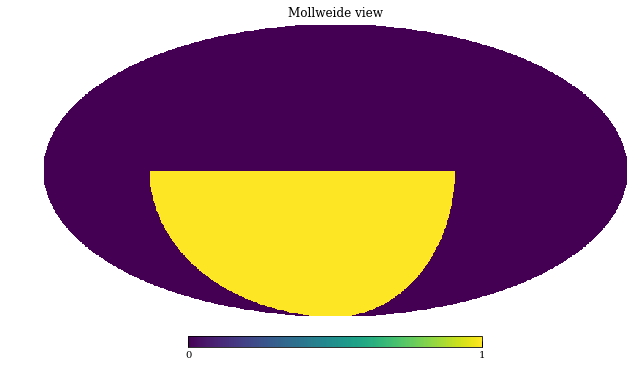

In [13]:
hp.mollview(mask1)
hp.mollview(mask2)
hp.mollview(mask3)
hp.mollview(mask4)

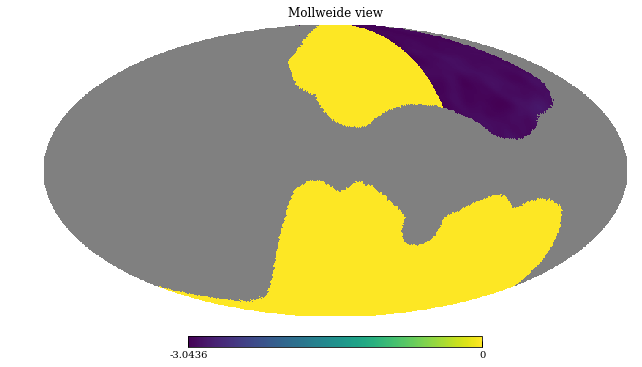

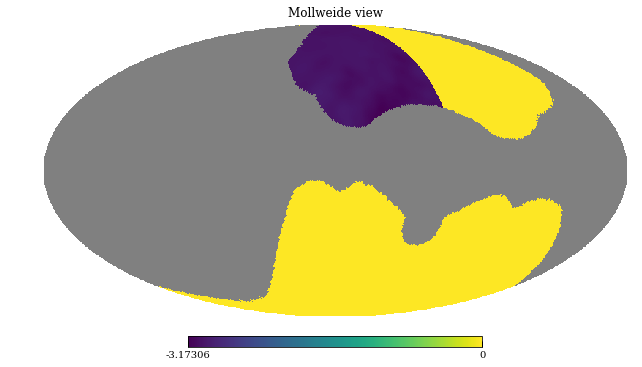

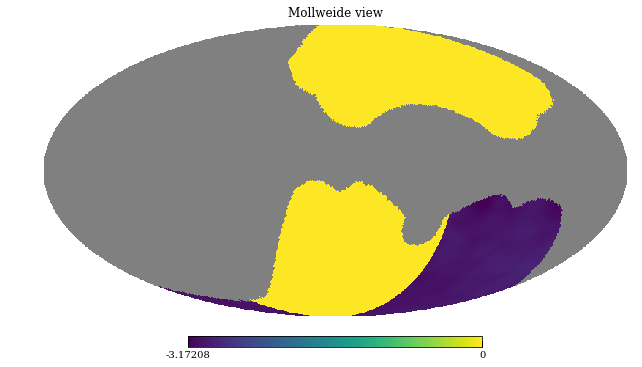

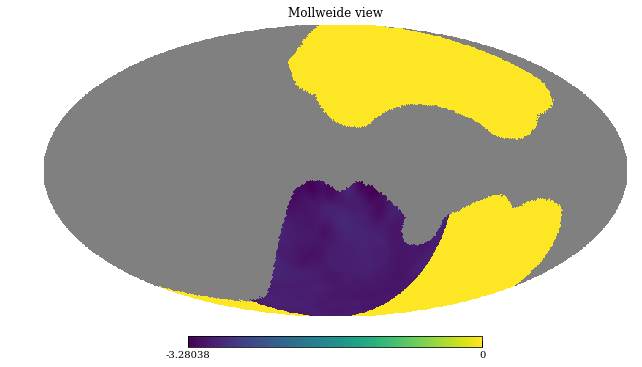

In [14]:
hp.mollview(beta_so_mask * mask1)
hp.mollview(beta_so_mask * mask2)
hp.mollview(beta_so_mask * mask3)
hp.mollview(beta_so_mask * mask4)

In [15]:
mask = np.zeros_like(mask1)
mask[mask1==1] = 1
mask[mask2==1] = 2
mask[mask3==1] = 3
mask[mask4==1] = 4

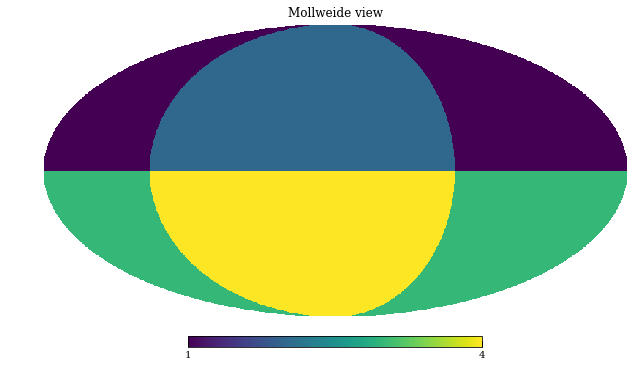

In [16]:
hp.mollview(mask)

# Binned pixelization scheme

Define new pixelization for fitting of spectral index. Mark four bins between -inf and +inf to determine spectral indices.

-3.281832695007324
-2.7380425930023193


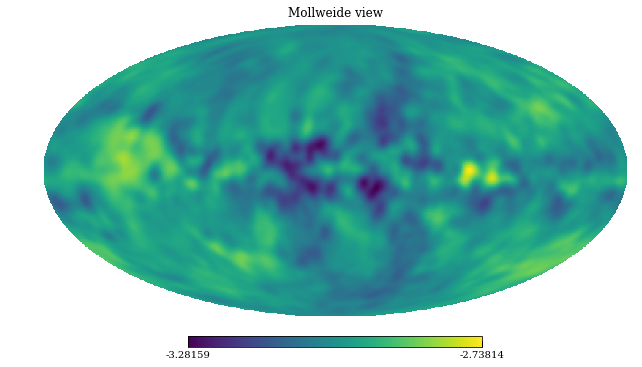

In [17]:
hp.mollview(beta)
print(beta.min())
print(beta.max())

In [18]:
binned_beta = np.histogram(beta, range=[-3.3, -2.7], bins=4)

In [19]:
masked_beta = pebbles.plotting.apply_so_mask(beta)

In [20]:
print(masked_beta.min())
print(masked_beta.max())

-3.280381917953491
-2.8474459648132324


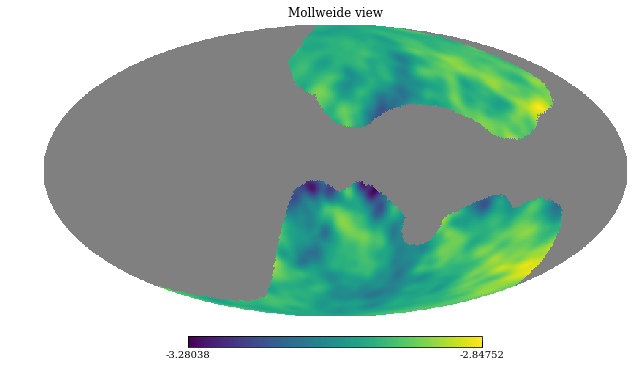

In [21]:
hp.mollview(masked_beta)

In [7]:
beta = pysm.nominal.models('d1', nside)[0]['spectral_index']
masked_beta=  pebbles.plotting.apply_so_mask(beta)

In [5]:
def binned_indices(beta, masked_beta, nbins=3):
    sorted_masked_beta = np.sort(masked_beta)
    stride = int(len(sorted_masked_beta.compressed()) / nbins)
    bounds = sorted_masked_beta.compressed()[stride::stride]
    print('bounds', bounds.shape)
    conds = []
    conds.append((beta < bounds[0]))
    for i in range(0, nbins - 2):
        print(i)
        conds.append((beta > bounds[i]) * (beta < bounds[i + 1]))
    conds.append((beta > bounds[-1]))
    zeros = np.zeros_like(beta)
    for i in range(nbins): 
        zeros[conds[i]] = i
    return zeros

nbins 3
bounds (2,)
0
nbins 4
bounds (3,)
0
1
nbins 5
bounds (5,)
0
1
2
nbins 6
bounds (5,)
0
1
2
3


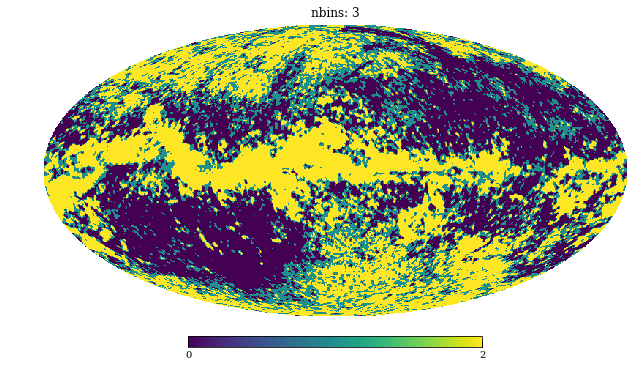

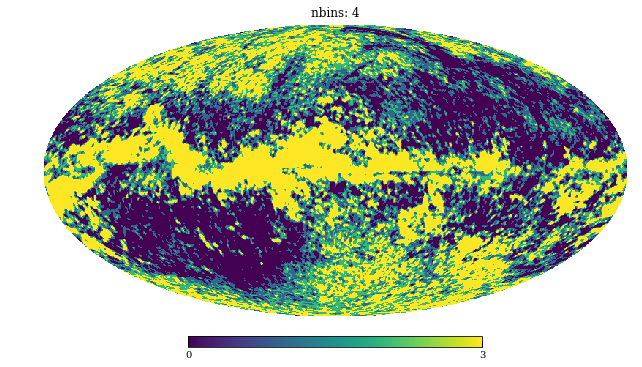

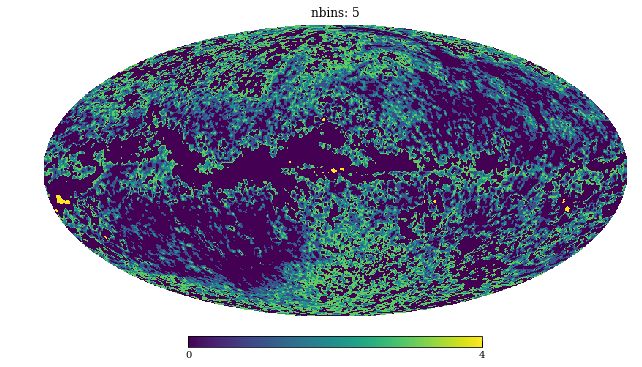

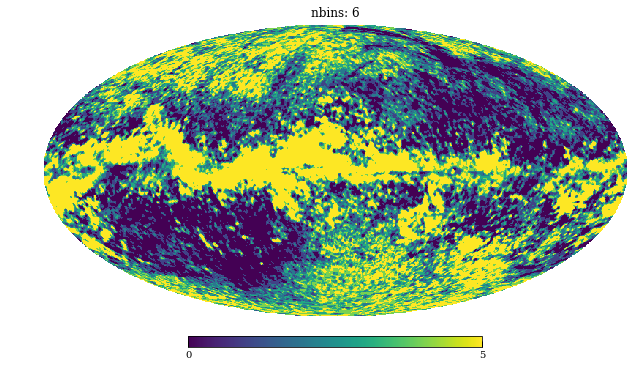

In [8]:
for nbins in range(3, 7):
    print('nbins', nbins)
    maps = binned_indices(beta, masked_beta, nbins=nbins)
    hp.mollview(maps, title='nbins: {:d}'.format(nbins))

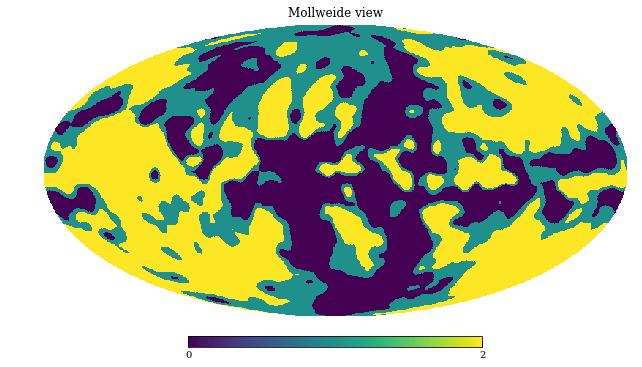

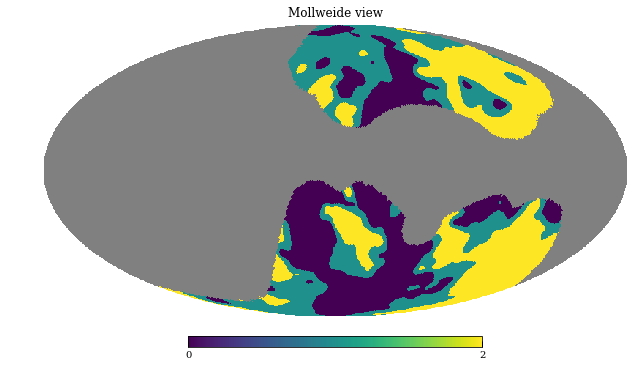

In [14]:
mask_func = pebbles.configurations.fittingmodels.comm_betad_wrap(10)   

In [15]:
mask = mask_func(nside)

In [16]:
mask_so = pebbles.plotting.apply_so_mask(mask)

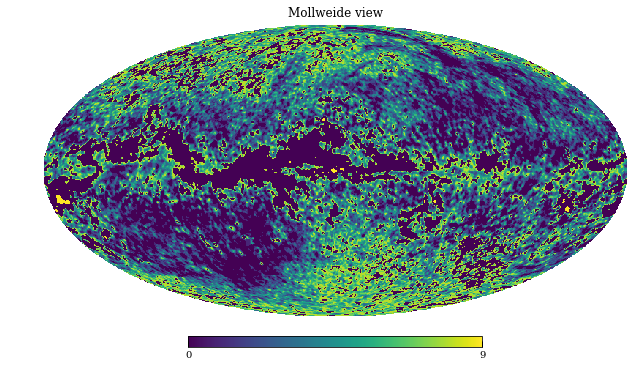

In [17]:
hp.mollview(mask)

In [18]:
np.mean(mask)

2.9567883809407554

In [19]:
np.mean(mask_so.compressed())

3.5999169930189

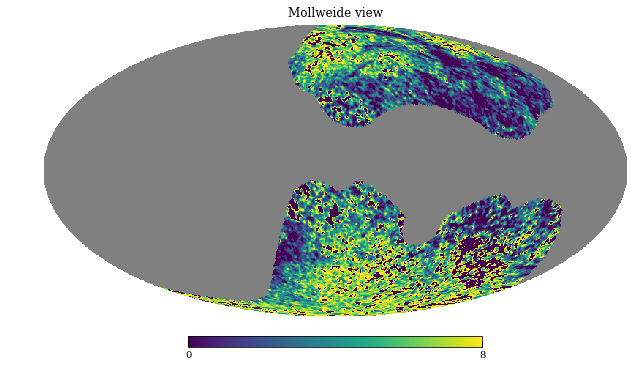

In [20]:
hp.mollview(mask_so)

(array([5.6389e+04, 2.8189e+04, 2.8189e+04, 2.8189e+04, 2.8189e+04,
        2.8189e+04, 2.8189e+04, 2.8189e+04, 2.8189e+04, 3.0000e+00,
        0.0000e+00]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <a list of 11 Patch objects>)

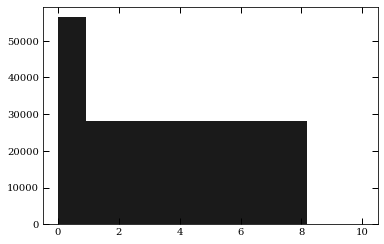

In [22]:
plt.hist(mask_so.compressed(), range=[0, 10], bins=11)